In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [426]:
dataset1 = pd.read_csv('./dataset2.csv')
# 数据归一化操作
dataset1 = (dataset1 - dataset1.mean())/dataset1.std()
dataset1.head(10)

,面积,房间数,价格
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389
5,-0.019732,1.090417,-0.323998
6,-0.587240,-0.223675,-0.204036
7,-0.721881,-0.223675,-1.130948
8,-0.781023,-0.223675,-1.026973
9,-0.637573,-0.223675,-0.783051


In [427]:
dataset1.describe()

,面积,房间数,价格
count,4.700000e+01,4.700000e+01,4.700000e+01
mean,3.779483e-17,2.746030e-16,-9.684924e-17
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.445423e+00,-2.851859e+00,-1.363666e+00
25%,-7.155897e-01,-2.236752e-01,-7.238702e-01
50%,-1.417900e-01,-2.236752e-01,-3.239979e-01
75%,3.376348e-01,1.090417e+00,3.521863e-01
max,3.117292e+00,2.404508e+00,2.874981e+00


In [397]:
# plt.figure()
# plt.scatter(dataset1['人口'],dataset1['收益'])
# plt.xlabel('人口')
# plt.ylabel('收益')
# plt.show()

In [428]:
# 在第一列加入 1，表示偏移 b 的系数为 1
dataset1.insert(0,'ones',1)

In [429]:
dataset1.head(10)

,ones,面积,房间数,价格
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626
3,1,-0.735723,-1.537767,-0.867025
4,1,1.257476,1.090417,1.595389
5,1,-0.019732,1.090417,-0.323998
6,1,-0.587240,-0.223675,-0.204036
7,1,-0.721881,-0.223675,-1.130948
8,1,-0.781023,-0.223675,-1.026973
9,1,-0.637573,-0.223675,-0.783051


In [430]:
X = dataset1.iloc[:,:-1]
Y = dataset1.iloc[:,-1]

In [431]:
X.head(10)

,ones,面积,房间数
0,1,0.130010,-0.223675
1,1,-0.504190,-0.223675
2,1,0.502476,-0.223675
3,1,-0.735723,-1.537767
4,1,1.257476,1.090417
5,1,-0.019732,1.090417
6,1,-0.587240,-0.223675
7,1,-0.721881,-0.223675
8,1,-0.781023,-0.223675
9,1,-0.637573,-0.223675


In [432]:
Y.head()

0    0.475747
1   -0.084074
2    0.228626
3   -0.867025
4    1.595389
Name: 价格, dtype: float64

In [433]:
x_train = np.array(X.values)
y_train = np.array(Y.values).reshape(-1,1)
w = np.zeros(x_train.shape[1])
w

array([0., 0., 0.])

In [434]:
x_train.shape,y_train.shape,w.shape

((47, 3), (47, 1), (3,))

In [436]:
a = 0.01
iters = 1000

In [437]:
def count_loss(x,y,w):    
    temp = np.power(np.dot(x,w.reshape(-1,1)) - y,2)
    return np.sum(temp)/(2 * x.shape[0])

In [438]:
def gradient_decent(x,y,w,a,iters):
#     temp_w = np.matrix(np.zeros(w.shape))
    costs = []
    for i in range(iters):
        temp = np.dot(x,w.reshape(-1,1)) - y
        for param in range(w.shape[0]):
            sum_ = np.sum(np.multiply(temp, x[:,param].reshape(-1,1)))
            w[param] = w[param] - (a/x.shape[0]) * sum_
        costs.append(count_loss(x,y,w))
    return costs,w           

In [439]:
w_ = np.array([i for i in w])
costs,w_new = gradient_decent(x_train,y_train,w_,a,iters)
w_new

array([-1.10910099e-16,  8.78503652e-01, -4.69166570e-02])

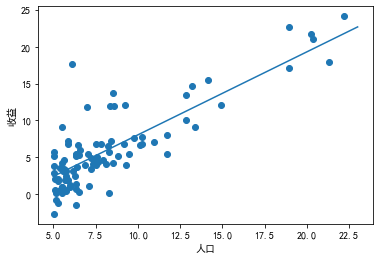

In [393]:
plt.figure()

x = np.linspace(5,23)
y = w_new[1] * x + w_new[0]

plt.plot(x,y)
plt.scatter(dataset1['人口'],dataset1['收益'])
plt.xlabel('人口')
plt.ylabel('收益')
plt.show()

## 训练次数与loss的曲线图

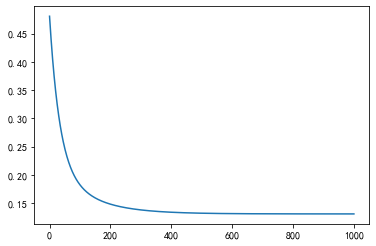

In [441]:
plt.figure()
x = np.arange(0,1000,1)
plt.plot(x,costs)
plt.show()

# 最小二乘法

In [453]:
x_matrix = np.matrix(X.values)
y_matrix = np.matrix(Y.values).reshape(-1,1)

In [454]:
x_matrix.shape,y_matrix.shape

((47, 3), (47, 1))

In [455]:
def lsm(x,y):
    return np.dot(np.linalg.inv(np.dot(x.T, x)),np.dot(x.T, y))

In [456]:
w_lsm = lsm(x_matrix,y_matrix)
w_lsm

matrix([[-8.19424759e-17],
        [ 8.84765988e-01],
        [-5.31788197e-02]])